In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K
from keras.datasets import cifar10
import numpy as np

from utils import display_image
from Generator import Generator
from ProjectedGradientDescent import ProjectedGradientDescent

Using TensorFlow backend.


In [2]:
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = image/255
    image = tf.image.resize(image, (224, 224))
    image = image[None, ...]
    return image

In [3]:
pretrained_model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')
pretrained_model.trainable = False

image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)

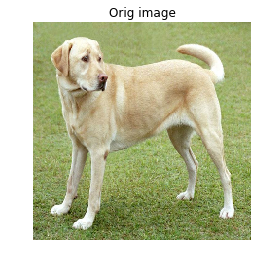

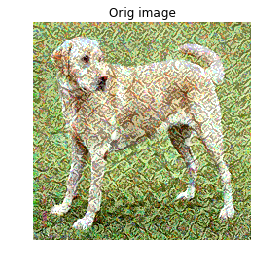

In [4]:
target_class = 5
n_classes = 1000
prob = tf.one_hot([target_class], n_classes)
pgd = ProjectedGradientDescent(pretrained_model, image, prob)
_ = pgd.gen_adv_example(showImage=True)

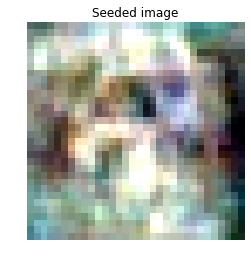

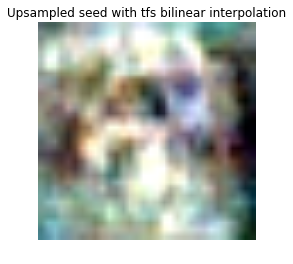

In [7]:
generator = Generator()
generator.calc_class_stats()

seed = generator.generate_seed(5)
seed_image = preprocess(seed)
display_image(seed, "Seeded image")
display_image(seed_image, "Upsampled seed with tfs bilinear interpolation")

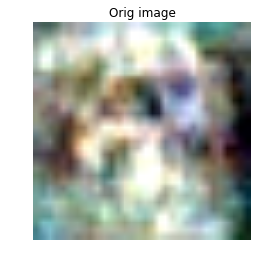

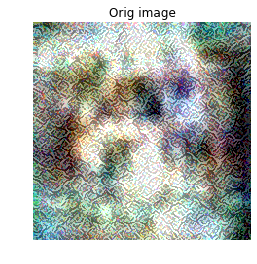

In [8]:
target_class = 5
n_classes = 1000
prob = tf.one_hot([target_class], n_classes)
pgd = ProjectedGradientDescent(pretrained_model, seed_image, prob)
_ = pgd.gen_adv_example(showImage=True)

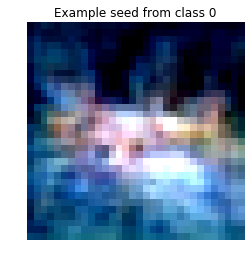

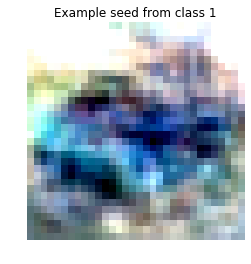

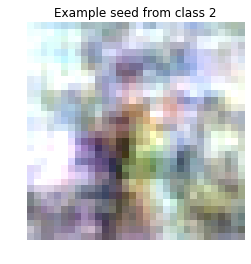

In [9]:
generator.visualize_example_seeds()